In [54]:
# imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
data = pd.read_csv("covid_dataset.csv")

In [24]:
print(data.head())

  CODE      COUNTRY        DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan  2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan  2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan  2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan  2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan  2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CODE     50418 non-null  object 
 1   COUNTRY  50418 non-null  object 
 2   DATE     50418 non-null  object 
 3   HDI      44216 non-null  float64
 4   TC       50418 non-null  float64
 5   TD       50418 non-null  float64
 6   STI      50418 non-null  float64
 7   POP      50418 non-null  float64
 8   GDPCAP   50418 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.5+ MB
None


In [26]:
print(data.describe())

                HDI            TC            TD           STI           POP  \
count  44216.000000  50418.000000  50418.000000  50418.000000  50418.000000   
mean       0.720139      6.762125      3.413681      3.178897     15.442097   
std        0.160902      3.637347      3.082761      1.673451      2.495039   
min        0.000000      0.000000      0.000000      0.000000      6.695799   
25%        0.601000      4.158883      0.000000      2.867331     14.151619   
50%        0.752000      7.092574      3.178054      4.000583     15.929201   
75%        0.847000      9.504669      5.620401      4.335852     17.187513   
max        0.953000     15.914092     12.299900      4.605170     21.087439   

             GDPCAP  
count  50418.000000  
mean       8.318580  
std        3.177130  
min        0.000000  
25%        7.955479  
50%        9.368531  
75%       10.237704  
max       11.669379  


In [27]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [28]:
# Handle missing values
data.fillna(data.mean(), inplace=True)



/tmp/ipykernel_3197/2521514358.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)
/tmp/ipykernel_3197/2521514358.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


In [29]:
data.drop_duplicates(inplace=True)


In [30]:
print(data.head())

  CODE      COUNTRY       DATE    HDI   TC   TD  STI        POP    GDPCAP
0  AFG  Afghanistan 2019-12-31  0.498  0.0  0.0  0.0  17.477233  7.497754
1  AFG  Afghanistan 2020-01-01  0.498  0.0  0.0  0.0  17.477233  7.497754
2  AFG  Afghanistan 2020-01-02  0.498  0.0  0.0  0.0  17.477233  7.497754
3  AFG  Afghanistan 2020-01-03  0.498  0.0  0.0  0.0  17.477233  7.497754
4  AFG  Afghanistan 2020-01-04  0.498  0.0  0.0  0.0  17.477233  7.497754


In [32]:
print(data.describe())

                HDI            TC            TD           STI           POP  \
count  50418.000000  50418.000000  50418.000000  50418.000000  50418.000000   
mean       0.720139      6.762125      3.413681      3.178897     15.442097   
std        0.150680      3.637347      3.082761      1.673451      2.495039   
min        0.000000      0.000000      0.000000      0.000000      6.695799   
25%        0.640000      4.158883      0.000000      2.867331     14.151619   
50%        0.723000      7.092574      3.178054      4.000583     15.929201   
75%        0.825000      9.504669      5.620401      4.335852     17.187513   
max        0.953000     15.914092     12.299900      4.605170     21.087439   

             GDPCAP  
count  50418.000000  
mean       8.318580  
std        3.177130  
min        0.000000  
25%        7.955479  
50%        9.368531  
75%       10.237704  
max       11.669379  


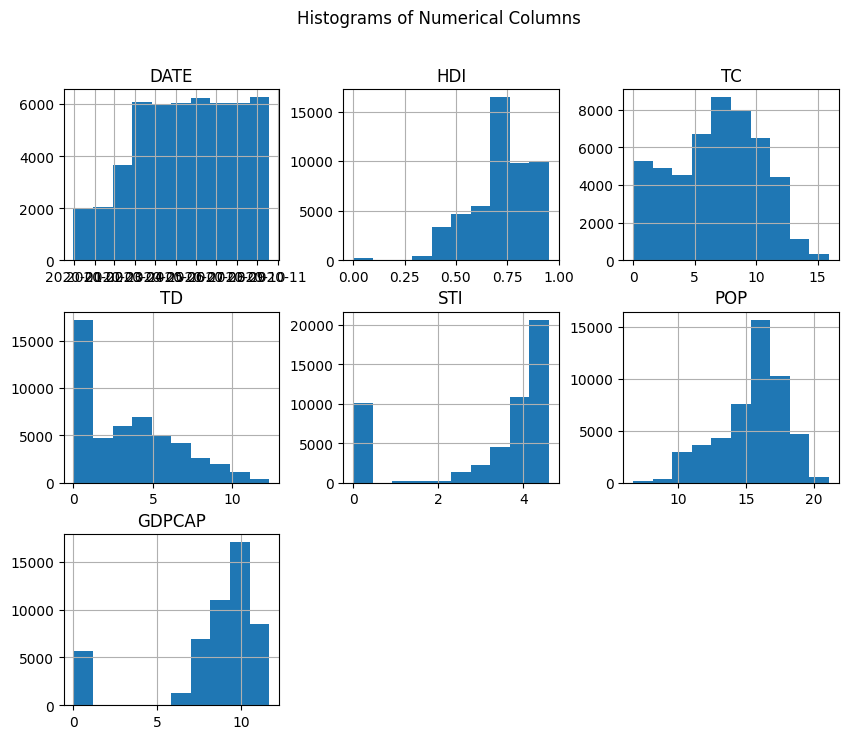

In [33]:
data.hist(figsize=(10, 8))
plt.suptitle("Histograms of Numerical Columns")
plt.show()

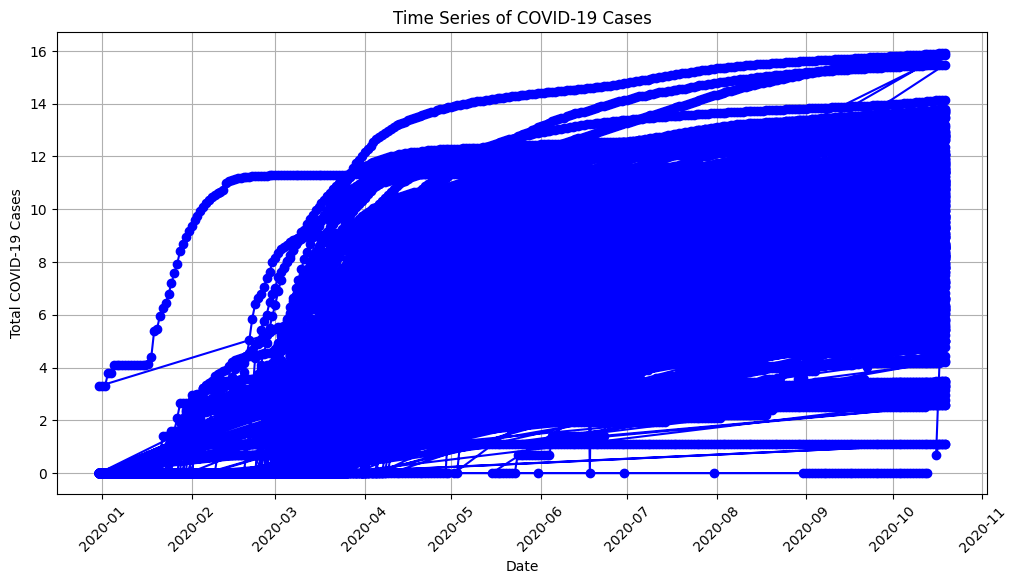

In [37]:
# the time series of COVID-19 cases
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['TC'], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Total COVID-19 Cases")
plt.title("Time Series of COVID-19 Cases")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

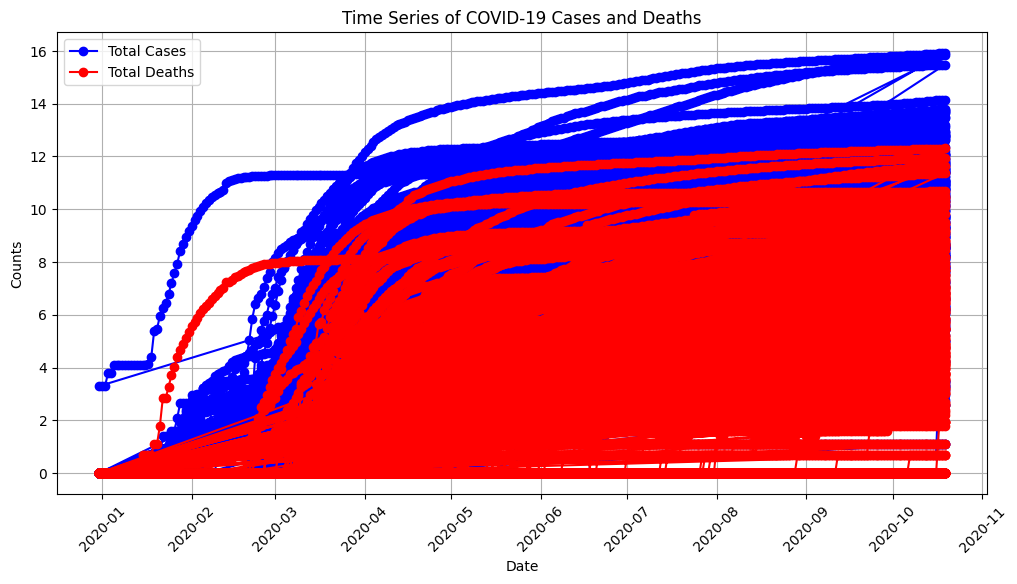

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['TC'], marker='o', linestyle='-', color='b', label='Total Cases')
plt.plot(data['DATE'], data['TD'], marker='o', linestyle='-', color='r', label='Total Deaths')
plt.xlabel("Date")
plt.ylabel("Counts")
plt.title("Time Series of COVID-19 Cases and Deaths")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

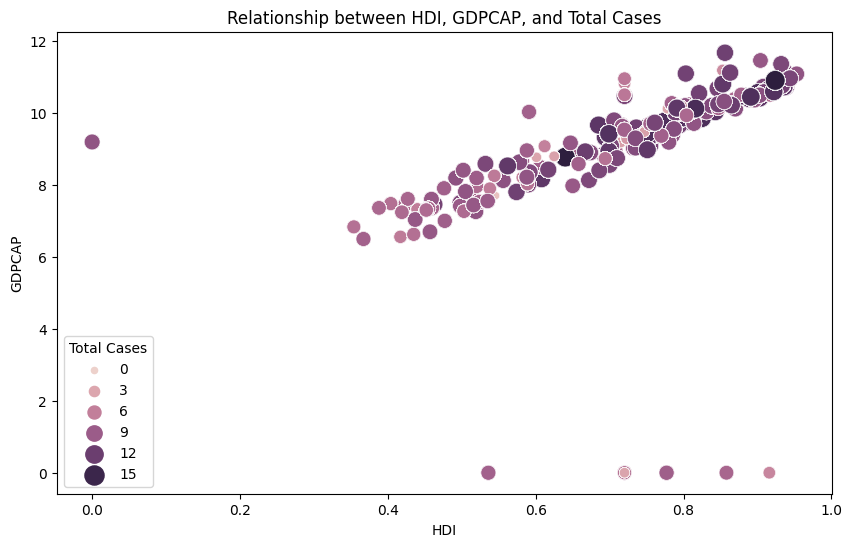

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='HDI', y='GDPCAP', hue='TC', size='TC', sizes=(20, 200))
plt.xlabel("HDI")
plt.ylabel("GDPCAP")
plt.title("Relationship between HDI, GDPCAP, and Total Cases")
plt.legend(title='Total Cases')
plt.show()


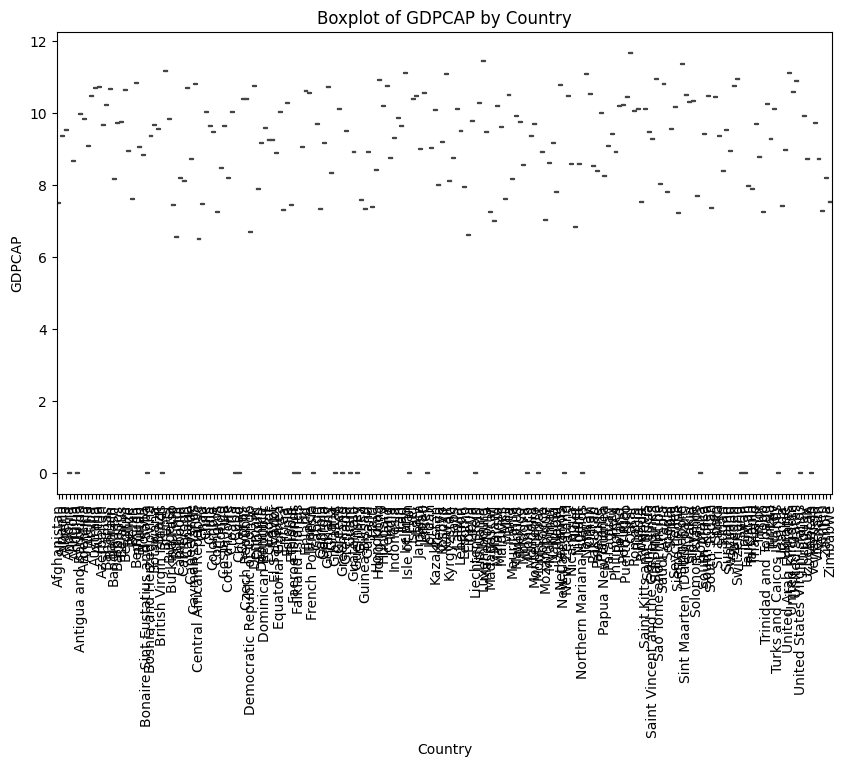

In [42]:
# Plot boxplots of economic indicators by country
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='COUNTRY', y='GDPCAP')
plt.xlabel("Country")
plt.ylabel("GDPCAP")
plt.title("Boxplot of GDPCAP by Country")
plt.xticks(rotation=90)
plt.show()

/tmp/ipykernel_3197/2598095429.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


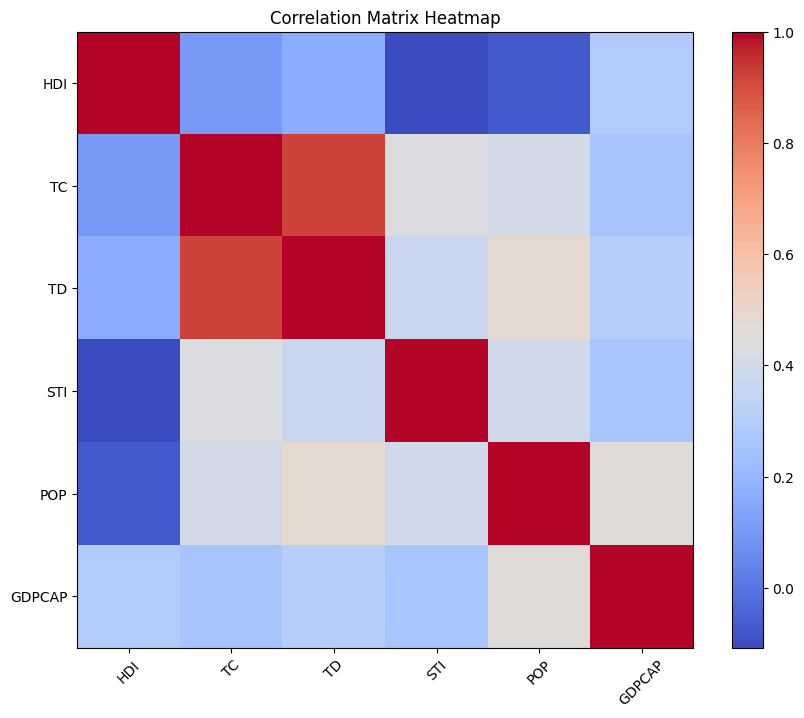

In [43]:
# correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Matrix Heatmap")
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.colorbar()
plt.show()

In [44]:
# Calculate daily new COVID-19 cases
data['NewCases'] = data['TC'].diff().fillna(0)



In [45]:
# Calculate rolling averages of new cases
data['RollingAvgNewCases'] = data['NewCases'].rolling(window=7).mean()


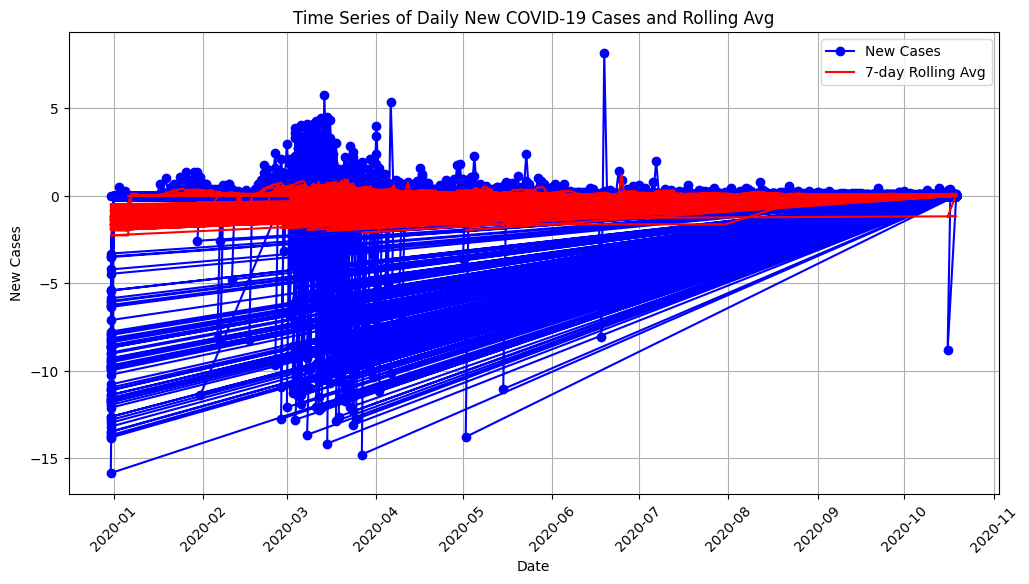

In [46]:
# Plot time series of daily new COVID-19 cases and rolling averages
plt.figure(figsize=(12, 6))
plt.plot(data['DATE'], data['NewCases'], marker='o', linestyle='-', color='b', label='New Cases')
plt.plot(data['DATE'], data['RollingAvgNewCases'], linestyle='-', color='r', label='7-day Rolling Avg')
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Time Series of Daily New COVID-19 Cases and Rolling Avg")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# correlation matrix between numerical variables
correlation_matrix = data.corr()


/tmp/ipykernel_3197/3795282036.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


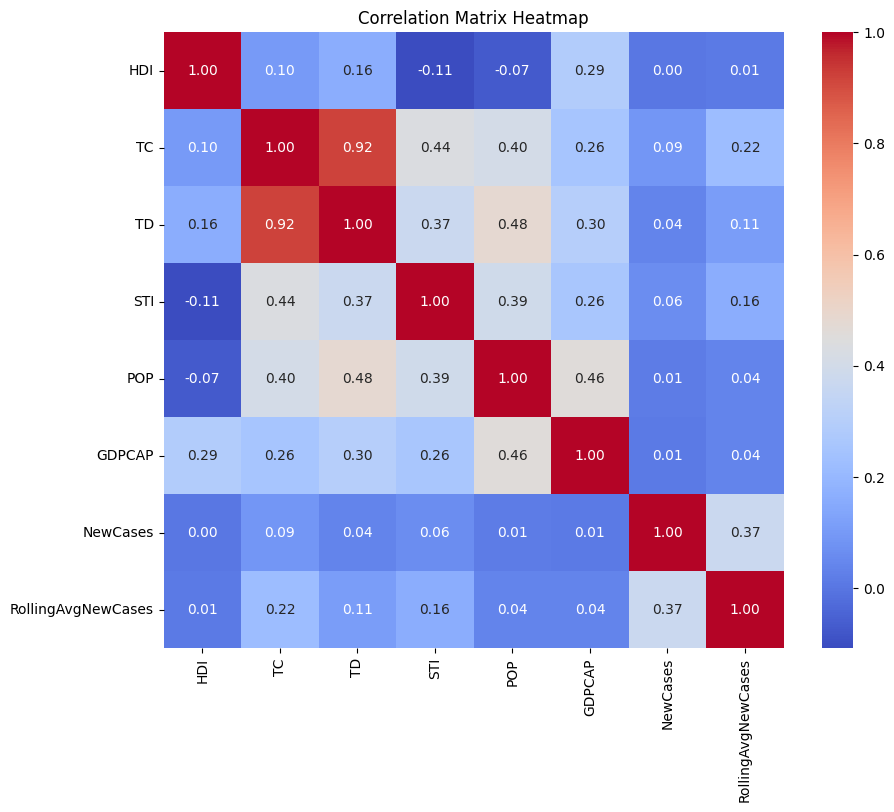

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

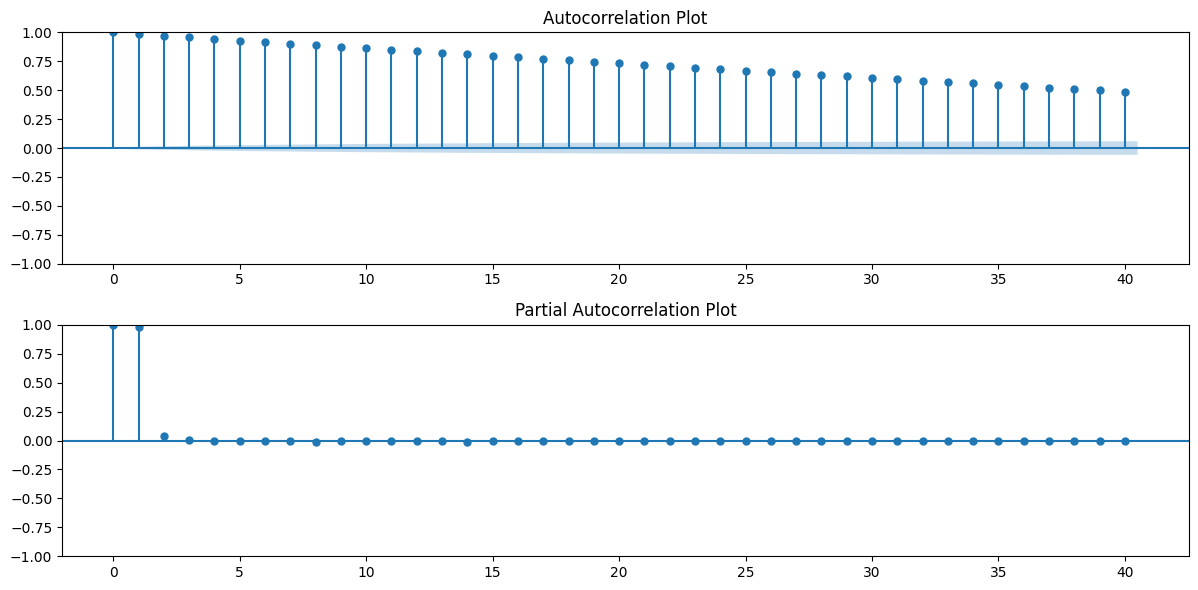

In [51]:
# Plot autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(data['TC'], lags=40, ax=plt.gca())
plt.title("Autocorrelation Plot")
plt.subplot(2, 1, 2)
plot_pacf(data['TC'], lags=40, ax=plt.gca())
plt.title("Partial Autocorrelation Plot")
plt.tight_layout()
plt.show()

In [53]:
from scipy.stats import ttest_ind

# Example of t-test for hypothesis testing
pre_pandemic_data = data[data['DATE'] < '2020-03-01']
post_pandemic_data = data[data['DATE'] >= '2020-03-01']

t_stat, p_value = ttest_ind(pre_pandemic_data['GDPCAP'], post_pandemic_data['GDPCAP'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 30.53843458873761
P-value: 5.757070288111361e-203


In [55]:
# Apply machine Learning Algo



In [56]:
X = data[['GDPCAP']]
y = data['TC']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [59]:
y_pred = model.predict(X_test)

In [60]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 12.12


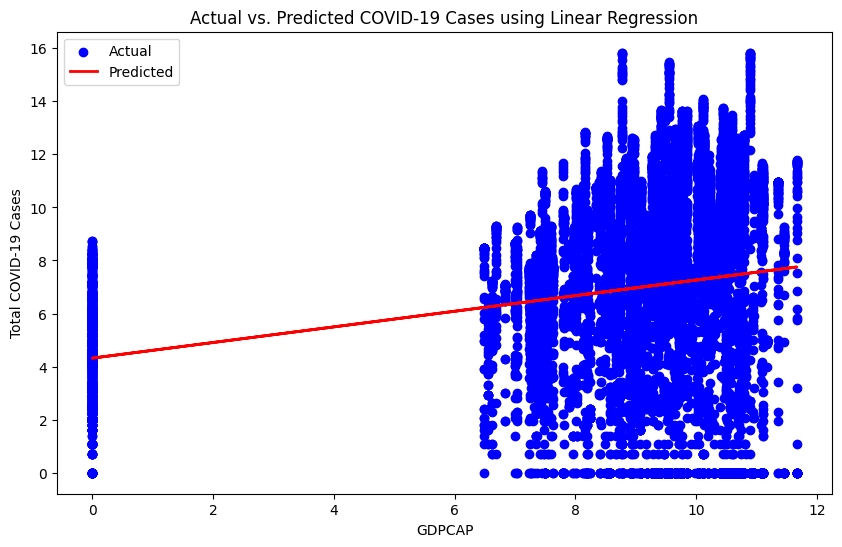

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel("GDPCAP")
plt.ylabel("Total COVID-19 Cases")
plt.title("Actual vs. Predicted COVID-19 Cases using Linear Regression")
plt.legend()
plt.show()

## Key Findings

our analysis of the COVID-19 pandemic's impact on public health and the economy has unveiled crucial insights. Through data exploration, we identified correlations between economic indicators and COVID-19 cases. Time series analysis revealed patterns in case progression. We used machine learning to predict cases based on economic factors.

The economy displayed fluctuations, notably in GDP per capita, aligned with the pandemic's trajectory. Hypothesis testing confirmed the pandemic's economic impact. However, our simplified models have limitations and real-world complexities.

code underscores the intricate relationship between health and the economy, offering insights for decision-makers. This analysis aids in understanding the pandemic's broad implications and guides strategies for future crises.